In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [27]:
df = pd.read_csv('./airfoil_self_noise.dat', delimiter='\t', names=[
    'Frequency',
    'Angle of attack',
    'Chord length',
    'Free-stream velocity',
    'Suction side displacement thickness',
    'Sound pressure level'
])
col_names = list(df)
cols = len(col_names)

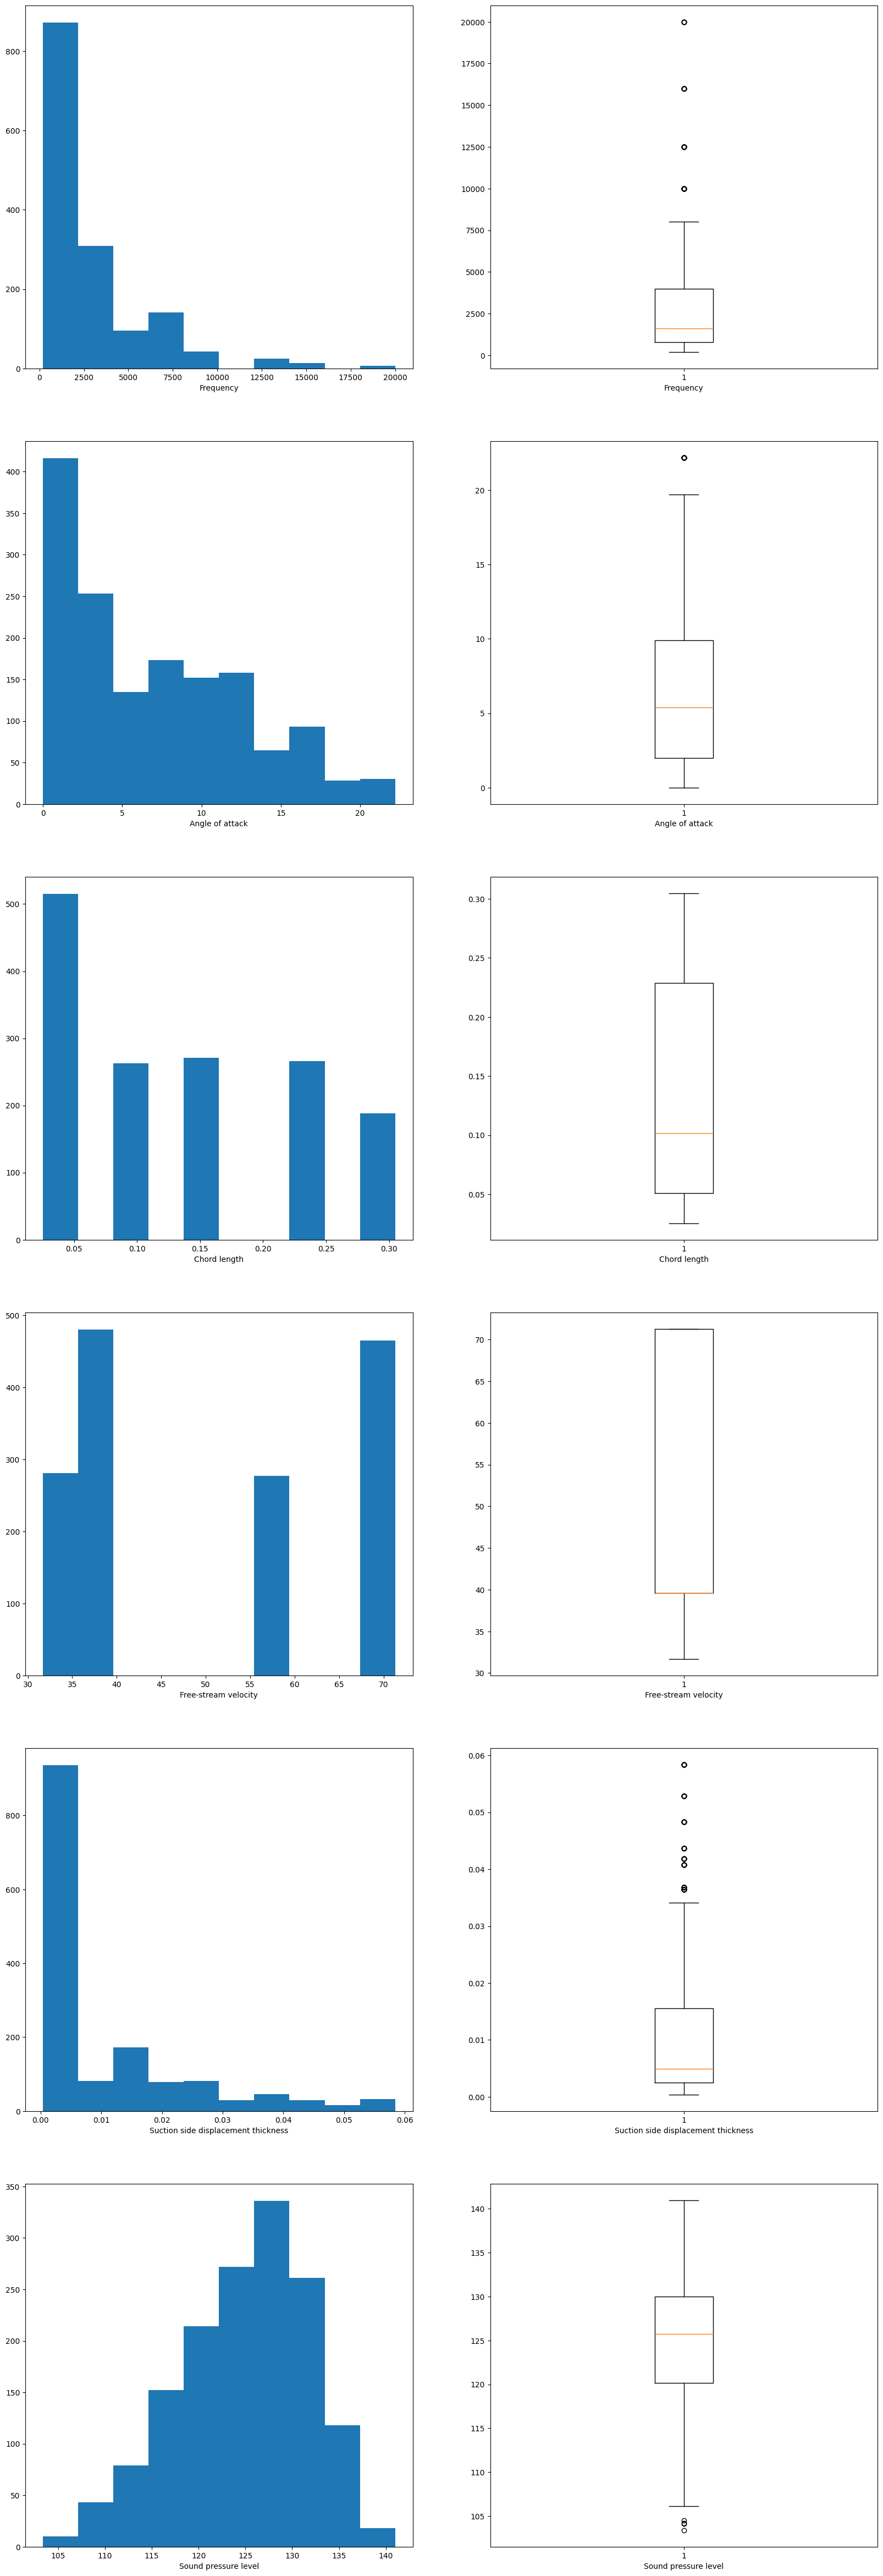

In [28]:
fig, ax = plt.subplots(ncols=2, nrows=cols, figsize=(2*10, cols*10))
for i in range(cols):
    label = col_names[i]
    data = df[label]
    ax[i][0].set_xlabel(label)
    ax[i][0].hist(data)
    ax[i][1].set_xlabel(label)
    ax[i][1].boxplot(data)
plt.show()


<Axes: >

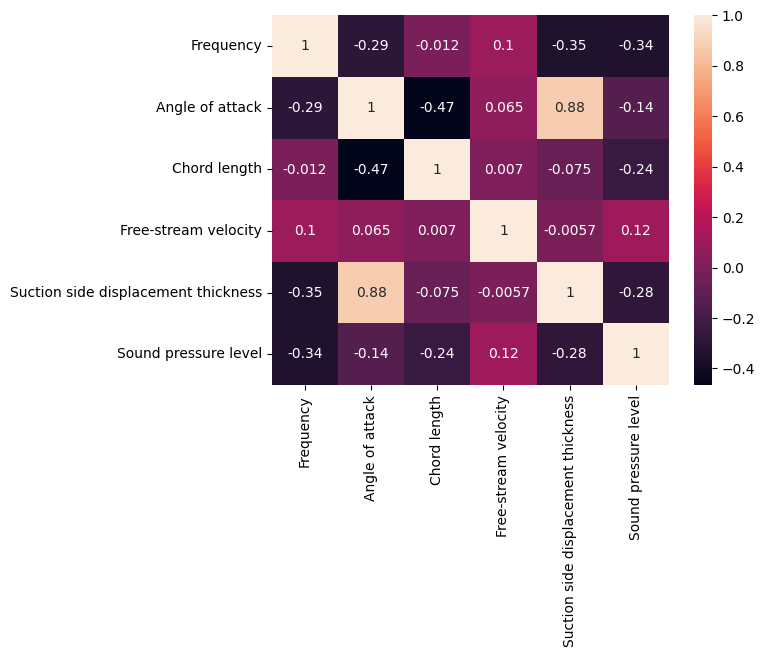

In [29]:
sns.heatmap(df.corr(method='spearman'), annot=True)

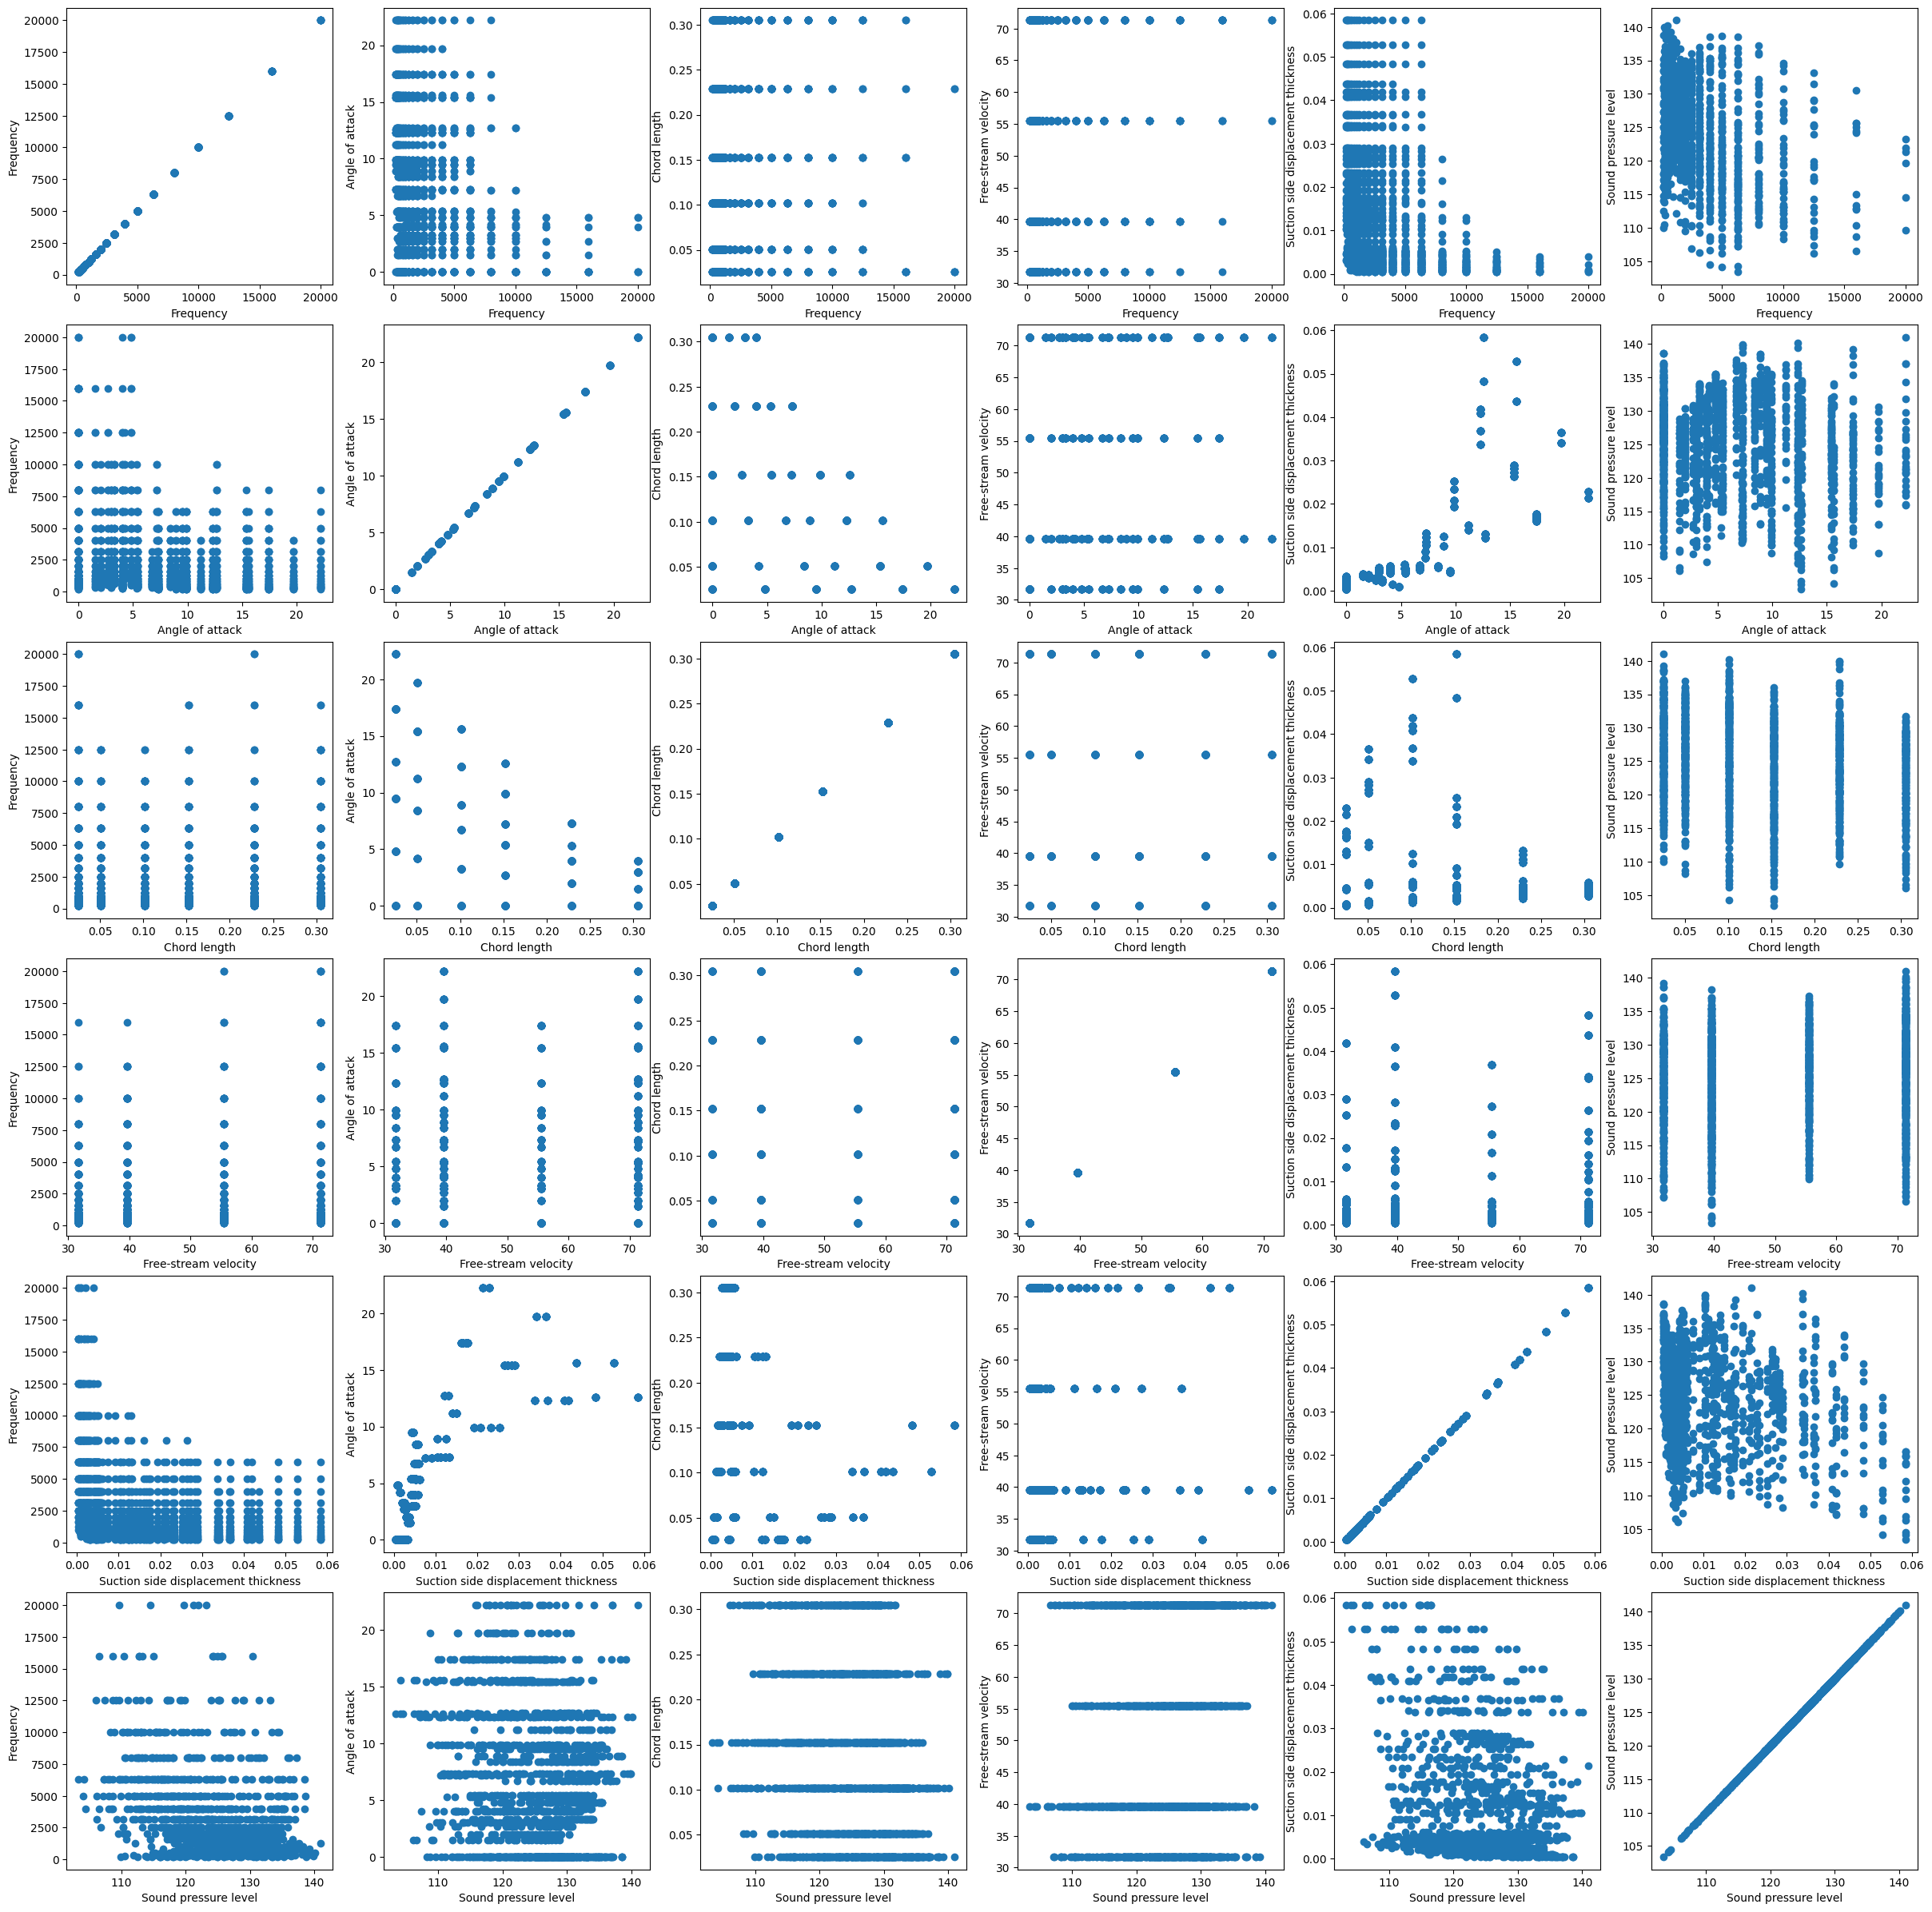

In [30]:
fig, ax = plt.subplots(cols, cols, figsize=(cols*4, cols*4))
fig.tight_layout(pad=1.5)
for i in range(cols):
    for j in range(cols):
        ax[i][j].scatter(df[col_names[i]], df[col_names[j]])
        ax[i][j].set_xlabel(col_names[i])
        ax[i][j].set_ylabel(col_names[j])

In [31]:
df_no_outliers = df.copy()
for n in col_names:
    Q1 = df[n].quantile(0.25)
    Q3 = df[n].quantile(0.75)
    max = Q3 + 1.5 * (Q3 - Q1)
    min = Q1 - 1.5 * (Q3 - Q1)
    df_no_outliers.loc[(df_no_outliers[n] > max),n] = np.nan
    df_no_outliers.loc[(df_no_outliers[n] < min),n] = np.nan
    median = df_no_outliers[n].quantile(0.50)
    df_no_outliers[n] = df_no_outliers[n].fillna(median)

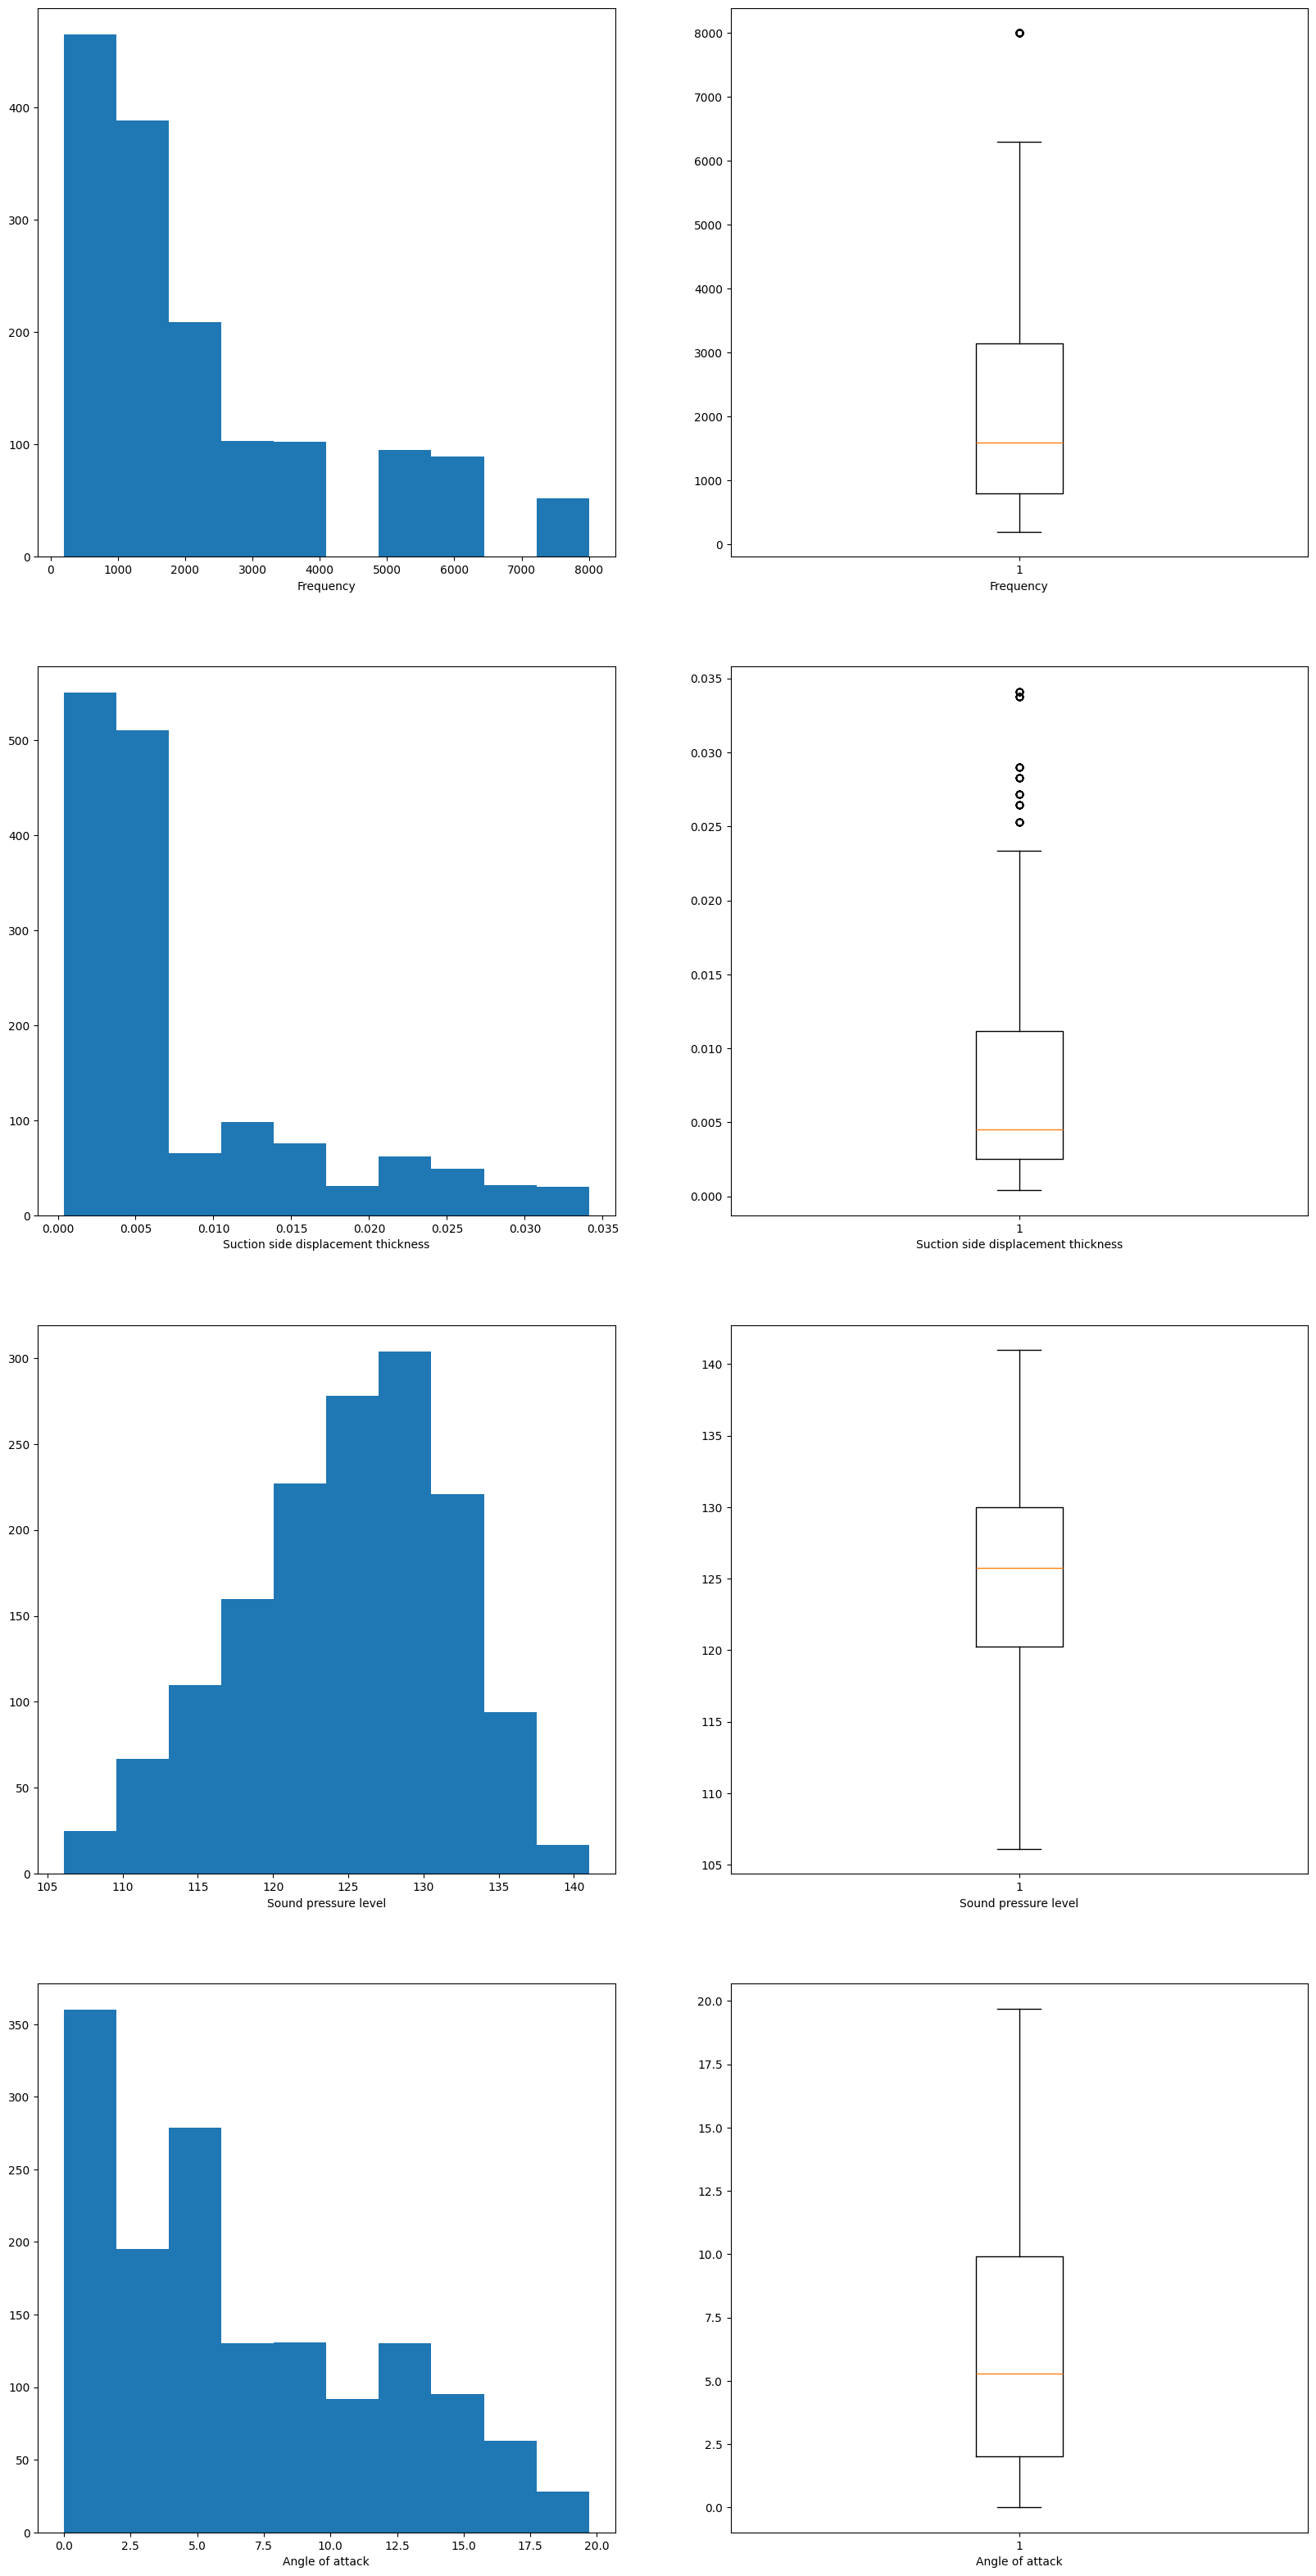

In [32]:
cleaned_col_names = list(set(col_names) - {'Chord length', 'Free-stream velocity'})
cleaned_cols = len(cleaned_col_names)
fig, ax = plt.subplots(ncols=2, nrows=cleaned_cols, figsize=(2*10, cleaned_cols*10))
for i in range(cleaned_cols):
    label = cleaned_col_names[i]
    data = df_no_outliers[label]
    ax[i][0].set_xlabel(label)
    ax[i][0].hist(data)
    ax[i][1].set_xlabel(label)
    ax[i][1].boxplot(data)
plt.show()


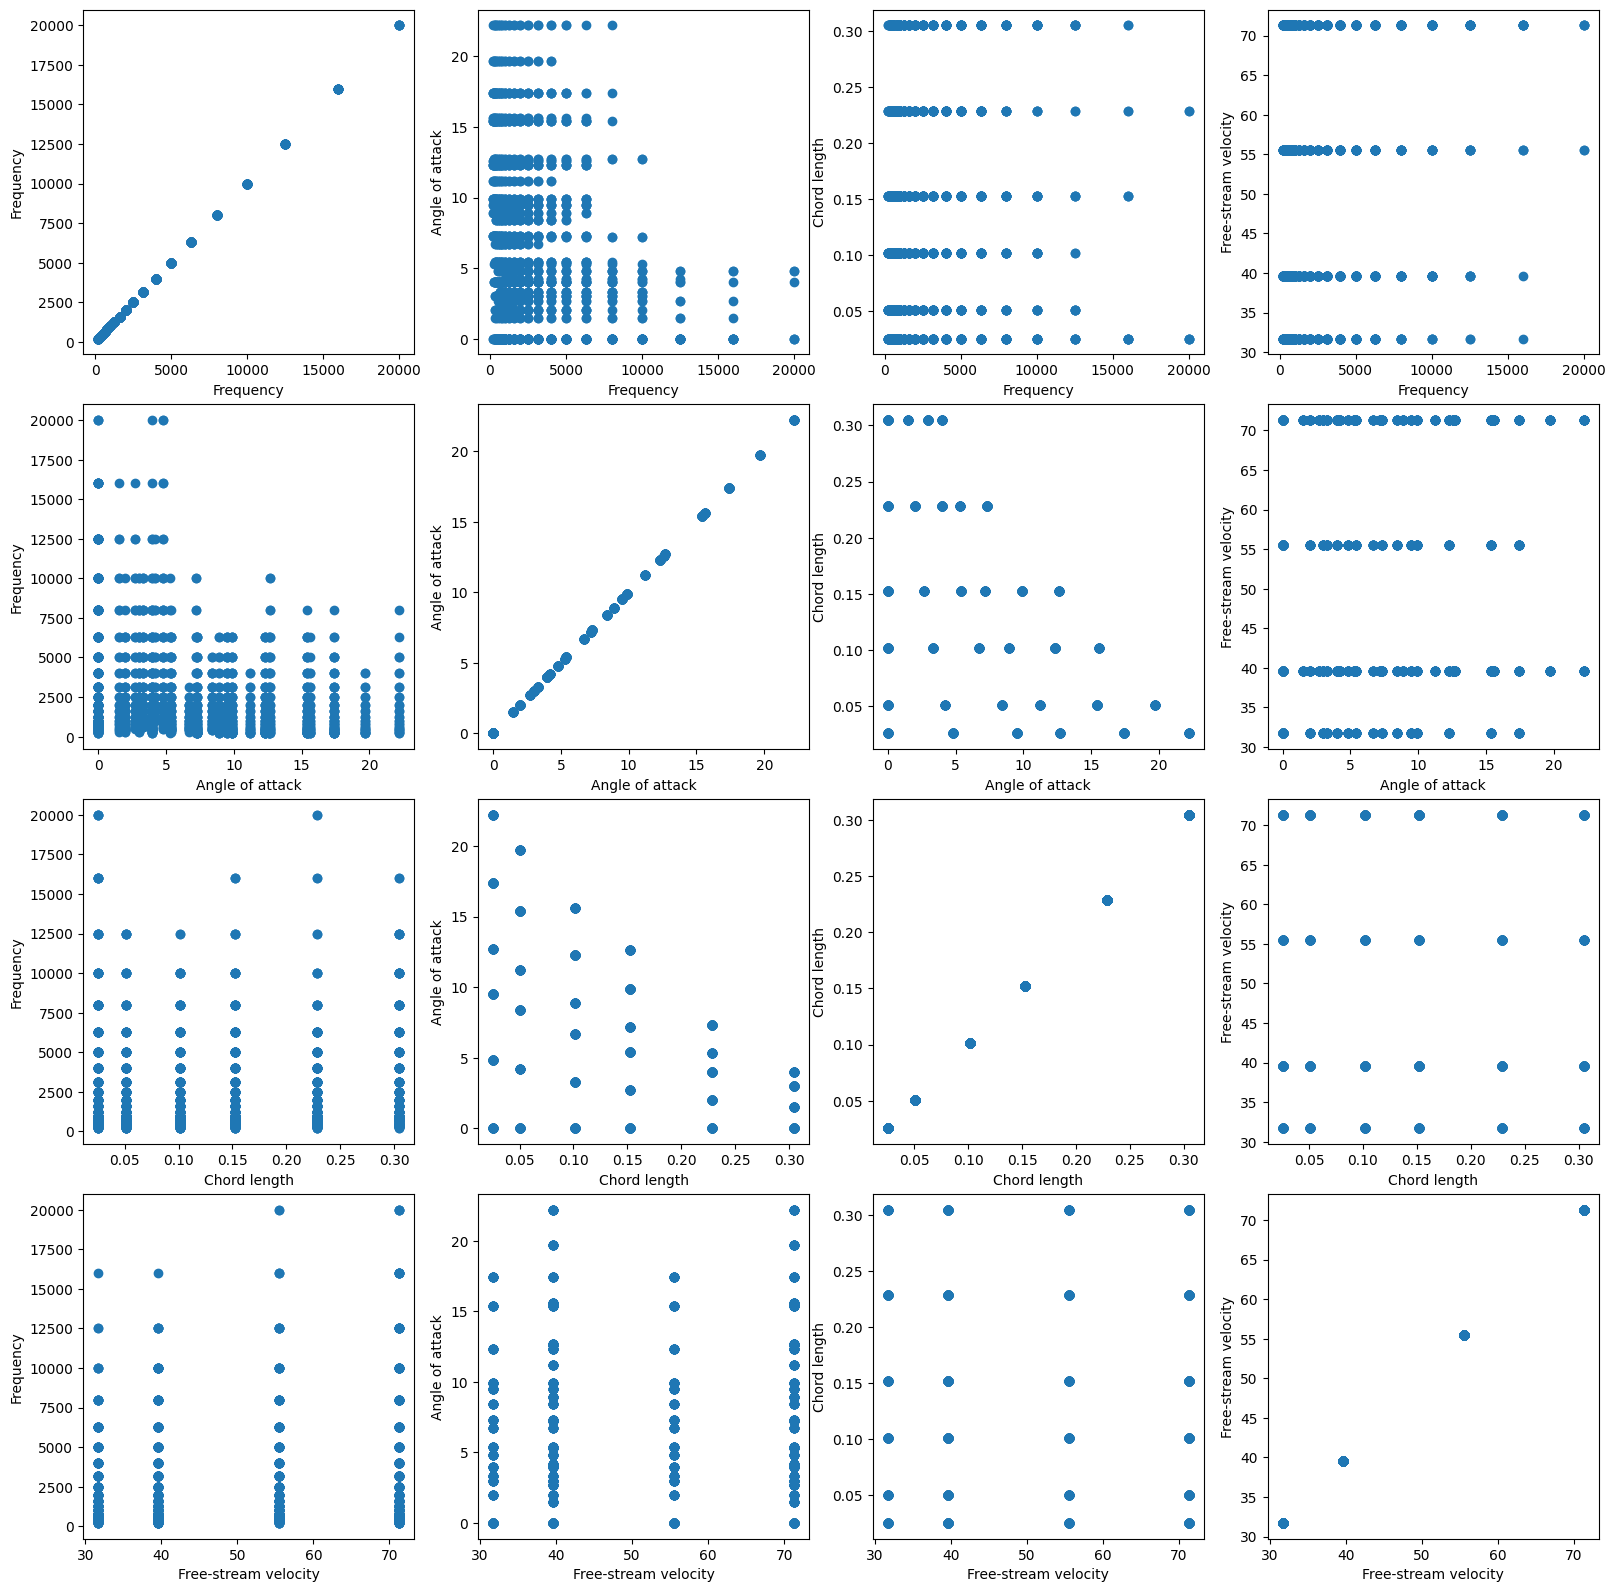

In [33]:
fig, ax = plt.subplots(cleaned_cols, cleaned_cols, 
                       figsize=(cleaned_cols*4, cleaned_cols*4))
fig.tight_layout(pad=1.5)
for i in range(cleaned_cols):
    for j in range(cleaned_cols):
        ax[i][j].scatter(df[col_names[i]], df[col_names[j]])
        ax[i][j].set_xlabel(col_names[i])
        ax[i][j].set_ylabel(col_names[j])

In [37]:
input_col_names = list(set(col_names) - {'Sound pressure level'})
input_cols = len(input_col_names)
df_after_all = df_no_outliers.copy()
df_after_all[input_col_names] = MinMaxScaler().fit_transform(df_no_outliers[input_col_names])

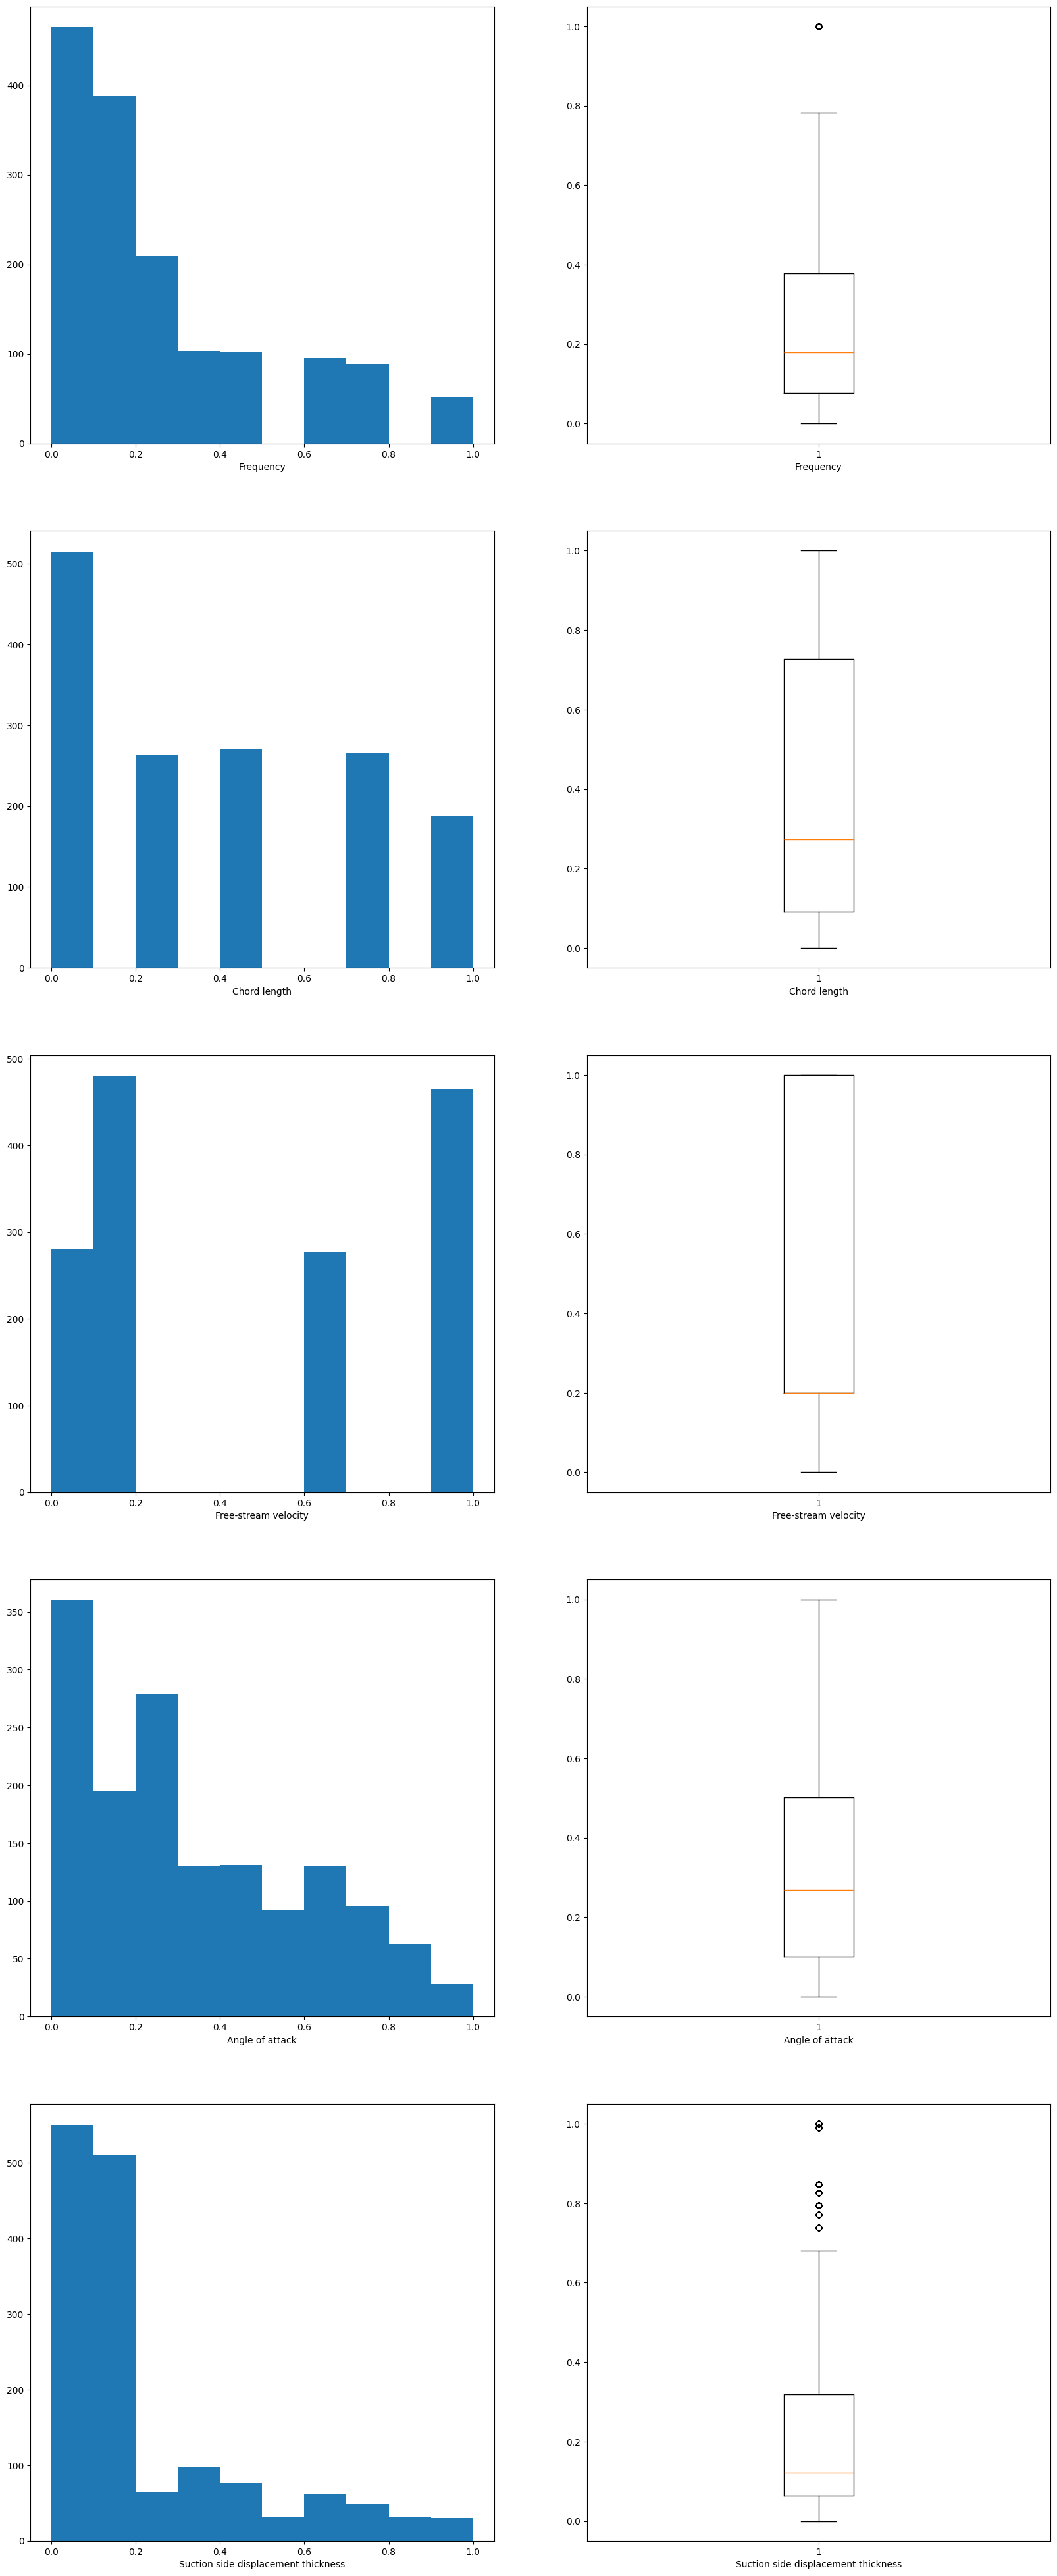

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=input_cols, figsize=(2*10, input_cols*10))
for i in range(len(input_col_names)):
    label = input_col_names[i]
    data = df_after_all[label]
    ax[i][0].set_xlabel(label)
    ax[i][0].hist(data)
    ax[i][1].set_xlabel(label)
    ax[i][1].boxplot(data)
plt.show()

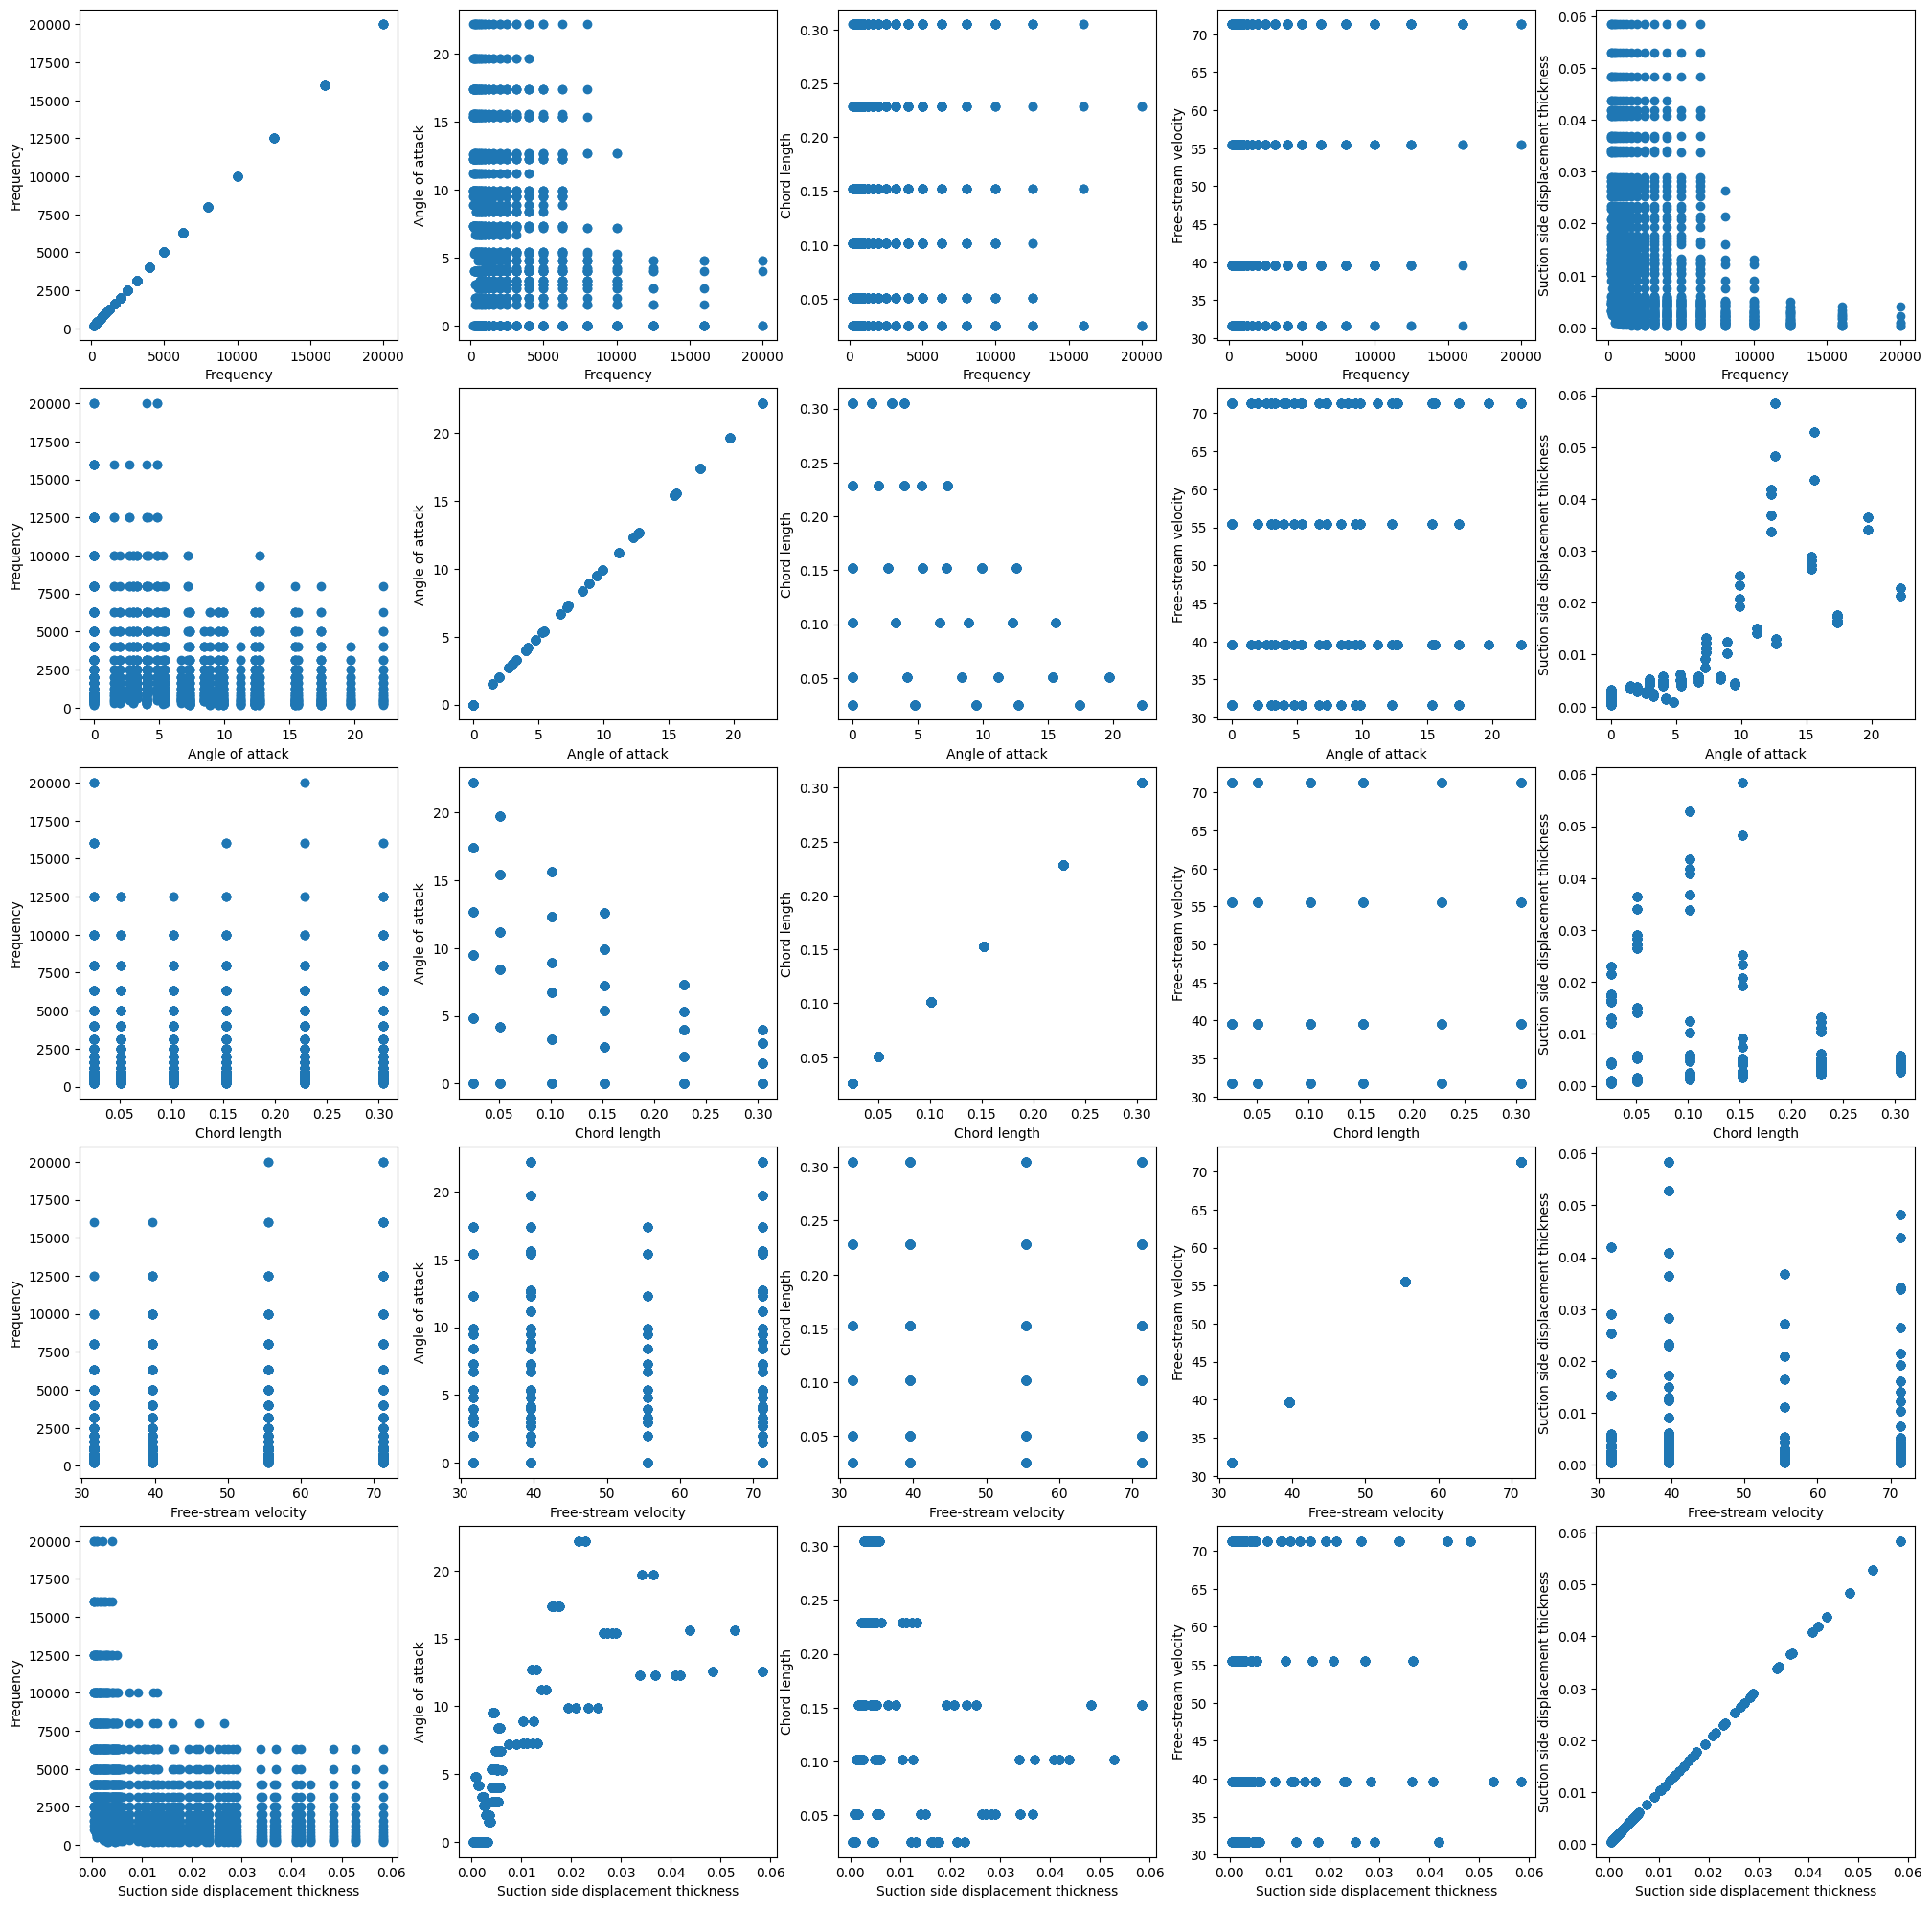

In [39]:
fig, ax = plt.subplots(input_cols, input_cols, 
                       figsize=(input_cols*4, input_cols*4))
fig.tight_layout(pad=1.5)
for i in range(input_cols):
    for j in range(input_cols):
        ax[i][j].scatter(df[col_names[i]], df[col_names[j]])
        ax[i][j].set_xlabel(col_names[i])
        ax[i][j].set_ylabel(col_names[j])